# PCA compressie

## Inlezen van de afbeelding

We lezen de afbeelding in, en splitsen deze in de RGB-kanalen.

Shape of the image: (2448, 3264, 3)


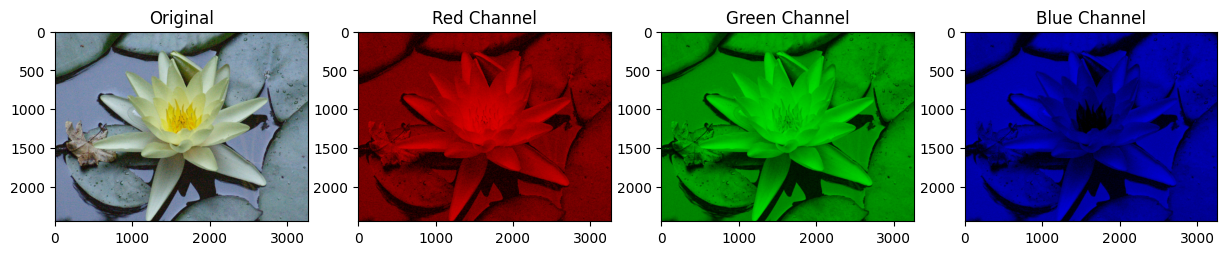

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

# read flower.jpg
image = imread('images/flower.jpg')
print(f'Shape of the image: {image.shape}')
# split into RGB channels

red = image[:, :, 0]  # shape is (2448, 3264)
green = image[:, :, 1]  # shape is (2448, 3264)
blue = image[:, :, 2]  # shape is (2448, 3264)

# plot the channels
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

ax[0].imshow(image)
ax[0].set_title('Original')

# replace the 0 with the channel you want to plot
single_color = np.zeros(image.shape, dtype='uint8')
single_color[:, :, 0] = red
ax[1].imshow(single_color)
ax[1].set_title('Red Channel')

# replace the 1 with the channel you want to plot
single_color = np.zeros(image.shape, dtype='uint8')
single_color[:, :, 1] = green
ax[2].imshow(single_color)
ax[2].set_title('Green Channel')

# replace the 2 with the channel you want to plot
single_color = np.zeros(image.shape, dtype='uint8')
single_color[:, :, 2] = blue
ax[3].imshow(single_color)
_ = ax[3].set_title('Blue Channel')


## Compressie van de afbeelding met PCA

In [3]:
from sklearn.decomposition import PCA

# aantal dimensies dat we willen behouden
n_components = 42

# PCA-modellen maken voor de 3 kanalen

pca_model_red = PCA(n_components=n_components) # dimensie van red is (2448, 3264)
red_in_pcs = pca_model_red.fit_transform(red) # dimension van red_in_pcs is (2448, 42)
pca_model_green = PCA(n_components=n_components) # dimensie van green is (2448, 3264)
green_in_pcs = pca_model_green.fit_transform(green) # dimension van green_in_pcs is (2448, 42)
pca_model_blue = PCA(n_components=n_components)  # dimensie van blue is (2448, 3264)
blue_in_pcs = pca_model_blue.fit_transform(blue) # dimension van blue_in_pcs is (2448, 42)

## Parameters van de modellen

In [4]:
# aantal PCs
print(f'Aantal PCs in rood kanaal: {pca_model_red.n_components_}')
print(f'Aantal PCs in groen kanaal: {pca_model_green.n_components_}')
print(f'Aantal PCs in blauw kanaal: {pca_model_blue.n_components_}')

# shape van de transformatiematrices
print(f'Shape van de transformatiematrix van het rode kanaal: {pca_model_red.components_.shape}')
print(f'Shape van de transformatiematrix van het groene kanaal: {pca_model_green.components_.shape}')
print(f'Shape van de transformatiematrix van het blauwe kanaal: {pca_model_blue.components_.shape}')


Aantal PCs in rood kanaal: 42
Aantal PCs in groen kanaal: 42
Aantal PCs in blauw kanaal: 42
Shape van de transformatiematrix van het rode kanaal: (42, 3264)
Shape van de transformatiematrix van het groene kanaal: (42, 3264)
Shape van de transformatiematrix van het blauwe kanaal: (42, 3264)


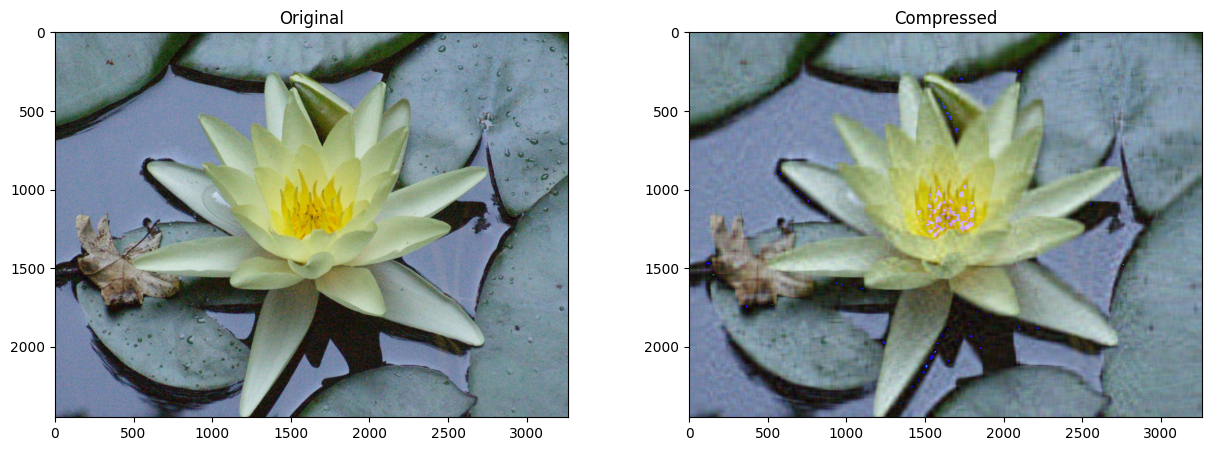

In [6]:
# originelen reconstrueren vanuit de PCs
red_compressed = pca_model_red.inverse_transform(red_in_pcs) # red_compressed heeft als dimensies terug (2448, 3264)
green_compressed = pca_model_green.inverse_transform(green_in_pcs) # green_compressed heeft als dimensies terug (2448, 3264)
blue_compressed = pca_model_blue.inverse_transform(blue_in_pcs) # blue_compressed heeft als dimensies terug (2448, 3264)

compressed_image = np.zeros(image.shape, dtype='uint8')
compressed_image[:, :, 0] = red_compressed
compressed_image[:, :, 1] = green_compressed
compressed_image[:, :, 2] = blue_compressed

# plot the decompressed image
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[1].imshow(compressed_image)
_ = ax[1].set_title('Compressed')

## Kwaliteit van de compressie

In [7]:
np.average([pca_model_red.explained_variance_ratio_.sum(),
            pca_model_green.explained_variance_ratio_.sum(),
            pca_model_blue.explained_variance_ratio_.sum()])

0.9422607084402133

## Compressie ratio

In [8]:
# aantal bytes in originele afbeelding
image_bytes = image.nbytes
print(f'Bytes in originele afbeelding: {image_bytes:,}\n')

# aantal bytes transformatiematrices
bytes_in_modellen = pca_model_red.components_.size * pca_model_red.components_.itemsize + pca_model_green.components_.size * pca_model_green.components_.itemsize + pca_model_blue.components_.size * pca_model_blue.components_.itemsize
bytes_in_pca_afbeeldingen = red_in_pcs.nbytes + green_in_pcs.nbytes + blue_in_pcs.nbytes
compressed_image_bytes = bytes_in_modellen + bytes_in_pca_afbeeldingen

print(f'Bytes in de transformatiematrices: {bytes_in_modellen:,}')
print(f'Bytes in de PC-afbeeldingen: {bytes_in_pca_afbeeldingen:,}')
print(f'Bytes in gecomprimeerde afbeelding: {compressed_image_bytes:,}\n')

# compressie ratio
print(f'Compressie ratio: {image.nbytes / (bytes_in_modellen + bytes_in_pca_afbeeldingen):.2f}')

Bytes in originele afbeelding: 23,970,816

Bytes in de transformatiematrices: 3,290,112
Bytes in de PC-afbeeldingen: 2,467,584
Bytes in gecomprimeerde afbeelding: 5,757,696

Compressie ratio: 4.16
